{12: ([<matplotlib.lines.Line2D at 0x7fcfd40c10f0>],
  [<matplotlib.text.Text at 0x7fcfd40c4080>]),
 13: ([<matplotlib.lines.Line2D at 0x7fcfd40c1860>],
  [<matplotlib.text.Text at 0x7fcfd40c4588>])}

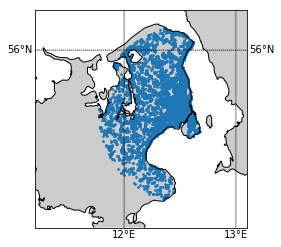

In [2]:
%matplotlib notebook
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

from datetime import date
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')
from mpl_toolkits.basemap import Basemap


dateparse = lambda x: pd.datetime.strptime(x, '%d-%m-%Y')
# A CSV file containing all scraped data, the result of assignment number two
complete_data = './boliga_all_loc.csv'
df = pd.read_csv(complete_data, parse_dates=['sell_date'], date_parser=dateparse)

df['zip_nr'] = [int(el.split(' ')[0]) 
                for el in df['zip_code'].values]
df['sell_year'] = df['sell_date'].dt.year


def distance(origin, destination):
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371 # km

    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
        * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius * c

    return d

df['distance'] = [distance((55.676111,12.568333), el)for el in df[[ 'lat','lon']].values]
#df.head()

from collections import Counter



mask = ((~df.lat.isnull()) & 
        (~df.lon.isnull()) & (df['distance'] <= 50) & 
        (df['sell_year'] == 2015))
df_zealand_00_05_large = df[mask]
x_values = df_zealand_00_05_large['lon']
y_values = df_zealand_00_05_large['lat']
# create new figure, axes instances.
fig = plt.figure()
ax = fig.add_axes([x_values.min(), y_values.min(), 
                   x_values.max(), y_values.max()])

# setup mercator map projection.
m = Basemap(llcrnrlon=11.2, llcrnrlat=55.1, 
            urcrnrlon=13.1, urcrnrlat=56.2,
            rsphere=(6378137.00, 6356752.3142),
            resolution='h', projection='merc',
            lat_0=40., lon_0=-20., lat_ts=20.)

m.drawcoastlines()
m.fillcontinents(zorder=0)
m.scatter(df_zealand_00_05_large.lon.values, 
          df_zealand_00_05_large.lat.values, 
          3, marker='o', latlon=True)

# draw parallels
m.drawparallels(np.arange(10, 90,  1), 
                labels=[1, 1, 0, 1])
# draw meridians
m.drawmeridians(np.arange(-180, 180, 1), 
                labels=[1, 1, 0, 1])


